In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df1 = pd.read_csv('data/cars45_data.csv')
df2 = pd.read_csv('data/cars45_data2.csv')
df = pd.concat([df1, df2], ignore_index=True)
df

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,"₦ 8,925,000",Petrol,Automatic,Ford,Fusion,2015.0,Gold,Local Used,145438.0,1500.0,Registered,Imported,Ford Fusion 2015 Gold,NaN,NaN,NaN,NaN,NaN,LAGOS
1,"₦ 7,875,000",Petrol,Automatic,Acura,MDX,2010.0,Silver,Local Used,187039.0,3500.0,Registered,Registered,Acura MDX 2010 Silver,NaN,NaN,NaN,NaN,NaN,LAGOS
2,"₦ 21,000,000",Petrol,Automatic,Mercedes-Benz,M Class,2013.0,Beige,Local Used,189747.0,3500.0,Registered,Imported,Mercedes-Benz M Class 2013 Beige,NaN,NaN,NaN,NaN,NaN,NaN
3,"₦ 5,616,000",Petrol,Automatic,Honda,Accord,2008.0,Silver,Local Used,201777.0,2400.0,Registered,Registered,Honda Accord 2008 Silver,NaN,NaN,NaN,NaN,NaN,Abuja
4,"₦ 6,300,000",Petrol,Automatic,Land Rover,Range Rover Sport,2008.0,Black,Local Used,244193.0,4400.0,Registered,Registered,Land Rover Range Rover Sport 2008 Black,NaN,NaN,NaN,NaN,NaN,LAGOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,"₦ 20,800,000",Petrol,Automatic,Toyota,Camry,2016.0,Black,Foreign Used,191564.0,2500.0,Imported,Imported,Toyota Camry 2016 Black,NaN,NaN,NaN,NaN,NaN,NaN
3038,"₦ 35,175,000",Petrol,Automatic,Lexus,GX,2011.0,Black,Local Used,56834.0,4600.0,Registered,Registered,Lexus GX 460 2011 Black,460,All Wheel,7,8.0,305.0,NaN
3039,"₦ 16,640,000",Petrol,Automatic,Hyundai,Sonata,2015.0,Black,Local Used,164530.0,2400.0,Registered,Imported,Hyundai Sonata 2015 Black,NaN,NaN,NaN,NaN,NaN,NaN
3040,"₦ 23,100,000",Petrol,Automatic,Toyota,RAV4,2014.0,Gray,Foreign Used,262304.0,2500.0,Imported,Imported,Toyota RAV4 2014 Gray,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.shape

(3042, 19)

In [62]:
df['gear type'].unique()

array(['Automatic', 'CVT', 'Manual', nan, 'AMT'], dtype=object)

In [63]:
df.columns

Index(['price', 'fuel type', 'gear type', 'Make', 'Model',
       'Year of manufacture', 'Colour', 'Condition', 'Mileage', 'Engine Size',
       'Selling Condition', 'Bought Condition', 'car', 'Trim', 'Drivetrain',
       'Seats', 'Number of Cylinders', 'Horse Power', 'Registered city'],
      dtype='object')

## Features

### Data from Cars 45 website

- PRICE : The price of the car in naira
- FUEL TYPE : petrol, hybrid, diesel, CNG
- GEAR TYPE : Automatic, CVT, Manual, AMT
- MAKE : make of the car or the brand name
- MODEL : specific model of the car
- YEAR OF MANUFACTURE : 
- COLOUR : 
- CONDITION : Locally used or foreign used
- MILEAGE : distance the car has travelled in its lifetime in kilometers
- ENGINE SIZE
- SELLING CONDITION : Registered, Imported, Brand new
- BOUGHT CONDITION : Registered, Imported, Brand new
- CAR : Full car name with model and make
- TRIM : car detail that state interior and exterior features
- DRIVETRAIN : AWD, RWD, etc
- SEATS : number of seats
- NUMBER OF CYLINDERS
- HORSE POWER
- REGISTERED CITY : registered city

In [64]:
df.isna().sum()

price                     0
fuel type               793
gear type               793
Make                    793
Model                   793
Year of manufacture     793
Colour                  793
Condition               793
Mileage                 833
Engine Size             854
Selling Condition       793
Bought Condition        793
car                       0
Trim                   2787
Drivetrain             2800
Seats                  2825
Number of Cylinders    2810
Horse Power            2817
Registered city        1917
dtype: int64

In [65]:
df.drop(columns=['Trim', 'Drivetrain',
       'Seats', 'Number of Cylinders', 'Horse Power', 'Registered city'], inplace=True)

In [66]:
df.dropna(inplace=True)

In [67]:
df.isna().sum()

price                  0
fuel type              0
gear type              0
Make                   0
Model                  0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
car                    0
dtype: int64

In [68]:
df.isna().sum()

price                  0
fuel type              0
gear type              0
Make                   0
Model                  0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
car                    0
dtype: int64

In [69]:
df.shape

(2149, 13)

In [70]:
df.nunique()

price                   547
fuel type                 4
gear type                 4
Make                     37
Model                   234
Year of manufacture      30
Colour                   16
Condition                 3
Mileage                1922
Engine Size              41
Selling Condition         3
Bought Condition          3
car                    1466
dtype: int64

In [71]:
df['Bought Condition'].value_counts()

Bought Condition
Imported      1233
Registered     860
Brand new       56
Name: count, dtype: int64

In [72]:
df['Year of manufacture'] = df['Year of manufacture'].astype(int)

In [73]:
df['price'] = pd.to_numeric(df['price'].str.replace('₦', '').str.replace(',', ''))

In [54]:
# Specify the column to check for outliers
column = ['price']
for column in column:
    # Compute IQR for the chosen column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers based on the chosen column
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(df.head())

      price fuel type  gear type           Make              Model  \
0   8925000    Petrol  Automatic           Ford             Fusion   
1   7875000    Petrol  Automatic          Acura                MDX   
2  21000000    Petrol  Automatic  Mercedes-Benz            M Class   
3   5616000    Petrol  Automatic          Honda             Accord   
4   6300000    Petrol  Automatic     Land Rover  Range Rover Sport   

   Year of manufacture  Colour   Condition   Mileage  Engine Size  \
0                 2015    Gold  Local Used  145438.0       1500.0   
1                 2010  Silver  Local Used  187039.0       3500.0   
2                 2013   Beige  Local Used  189747.0       3500.0   
3                 2008  Silver  Local Used  201777.0       2400.0   
4                 2008   Black  Local Used  244193.0       4400.0   

  Selling Condition Bought Condition                                      car  
0        Registered         Imported                    Ford Fusion 2015 Gold  
1   

In [74]:
df.isna().sum()

price                  0
fuel type              0
gear type              0
Make                   0
Model                  0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
car                    0
dtype: int64

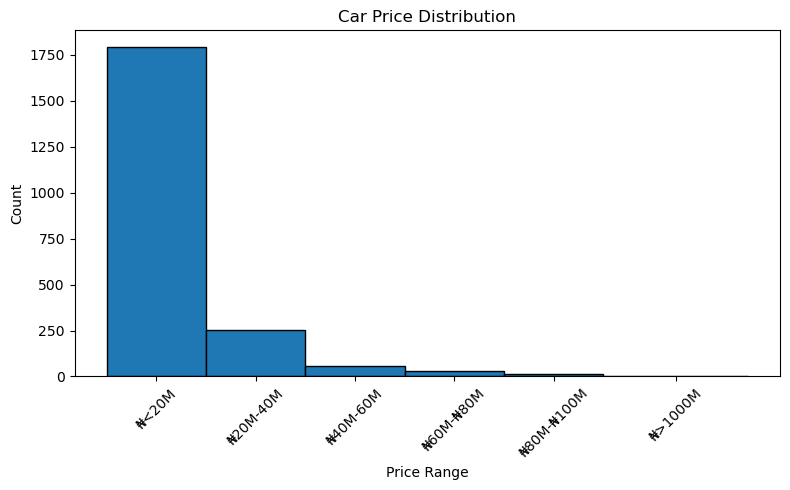

In [75]:
bins = [0,20000000,40000000,60000000,80000000,100000000 ,df['price'].max()]
labels = ['₦<20M','₦20M-40M', '₦40M-60M', '₦60M-₦80M','₦80M-₦100M', '₦>1000M']

plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=bins, edgecolor='black')
plt.title("Car Price Distribution")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.xticks(ticks=[(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)], labels=labels, rotation=45)
plt.tight_layout()
plt.show()

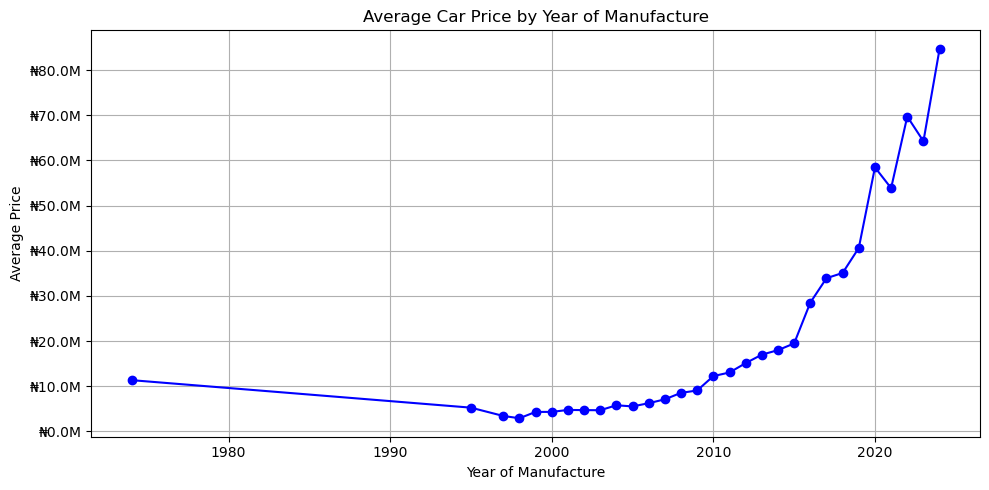

In [76]:
import matplotlib.ticker as ticker
yearly_avg_price = df.groupby('Year of manufacture')['price'].mean()

plt.figure(figsize=(10,5))
plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o', linestyle='-', color='b')
plt.title("Average Car Price by Year of Manufacture")
plt.xlabel("Year of Manufacture")
plt.ylabel("Average Price")
plt.grid(True)

# Format y-axis with Naira in millions
naira_formatter = ticker.FuncFormatter(lambda x, _: f"₦{x/1_000_000:.1f}M")
plt.gca().yaxis.set_major_formatter(naira_formatter)

plt.tight_layout()
plt.show()

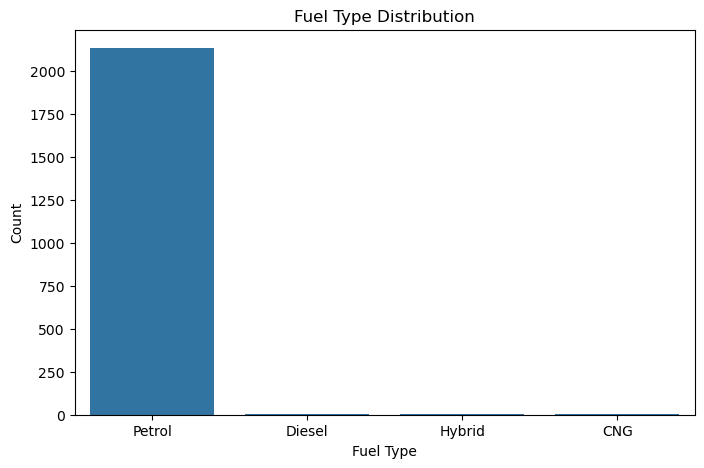

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['fuel type'], order=df['fuel type'].value_counts().index)
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

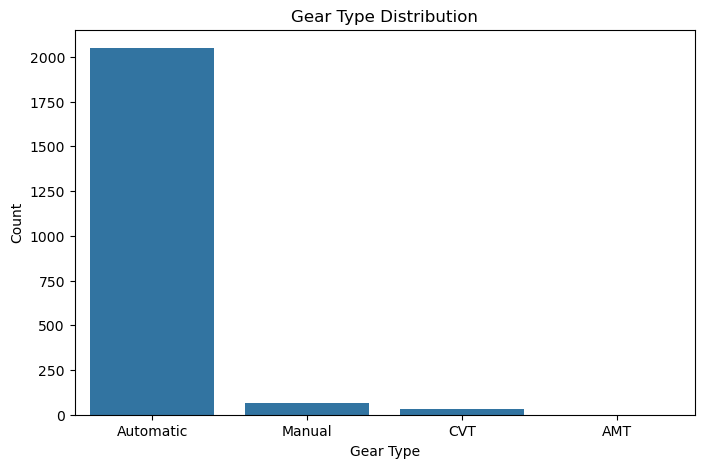

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['gear type'], order=df['gear type'].value_counts().index)
plt.title("Gear Type Distribution")
plt.xlabel("Gear Type")
plt.ylabel("Count")
plt.show()

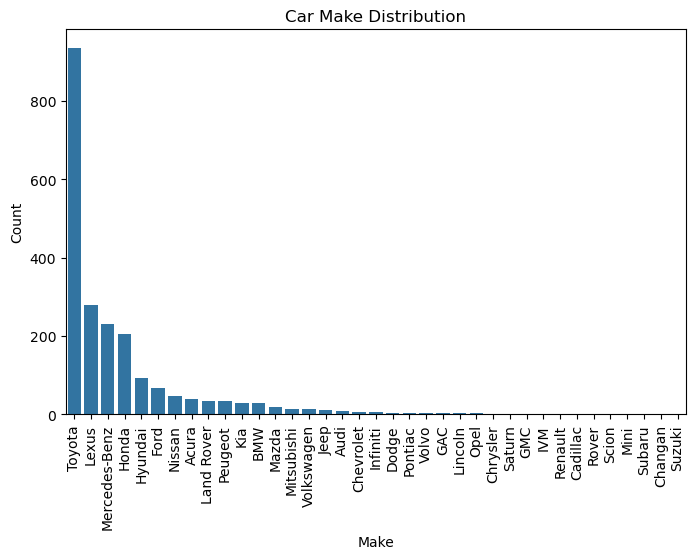

In [79]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Make'], order=df['Make'].value_counts().index)
plt.title("Car Make Distribution")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [80]:
make_counts = df['Make'].value_counts()

# Step 2: Keep only makes with 10 or more occurrences
makes_to_keep = make_counts[make_counts >= 10].index
print(makes_to_keep)
# Step 3: Filter the DataFrame
df = df[df['Make'].isin(makes_to_keep)]

Index(['Toyota', 'Lexus', 'Mercedes-Benz', 'Honda', 'Hyundai', 'Ford',
       'Nissan', 'Acura', 'Land Rover', 'Peugeot', 'Kia', 'BMW', 'Mazda',
       'Mitsubishi', 'Volkswagen', 'Jeep'],
      dtype='object', name='Make')


In [81]:
df.head()

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car
0,8925000,Petrol,Automatic,Ford,Fusion,2015,Gold,Local Used,145438.0,1500.0,Registered,Imported,Ford Fusion 2015 Gold
1,7875000,Petrol,Automatic,Acura,MDX,2010,Silver,Local Used,187039.0,3500.0,Registered,Registered,Acura MDX 2010 Silver
2,21000000,Petrol,Automatic,Mercedes-Benz,M Class,2013,Beige,Local Used,189747.0,3500.0,Registered,Imported,Mercedes-Benz M Class 2013 Beige
3,5616000,Petrol,Automatic,Honda,Accord,2008,Silver,Local Used,201777.0,2400.0,Registered,Registered,Honda Accord 2008 Silver
4,6300000,Petrol,Automatic,Land Rover,Range Rover Sport,2008,Black,Local Used,244193.0,4400.0,Registered,Registered,Land Rover Range Rover Sport 2008 Black


In [82]:
cols_to_drop = ['car', 'Model', 'Colour']
df.drop(cols_to_drop, axis=1, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20076\1085655883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(cols_to_drop, axis=1, inplace=True)


In [83]:
df.head()

,price,fuel type,gear type,Make,Year of manufacture,Condition,Mileage,Engine Size,Selling Condition,Bought Condition
0,8925000,Petrol,Automatic,Ford,2015,Local Used,145438.0,1500.0,Registered,Imported
1,7875000,Petrol,Automatic,Acura,2010,Local Used,187039.0,3500.0,Registered,Registered
2,21000000,Petrol,Automatic,Mercedes-Benz,2013,Local Used,189747.0,3500.0,Registered,Imported
3,5616000,Petrol,Automatic,Honda,2008,Local Used,201777.0,2400.0,Registered,Registered
4,6300000,Petrol,Automatic,Land Rover,2008,Local Used,244193.0,4400.0,Registered,Registered


In [84]:
df.to_csv('data/cars45_data_cleaned.csv', index=False)

In [ ]:
df

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car
0,10500000,Petrol,Automatic,Mercedes-Benz,CLA-Class,2014,White,Foreign Used,210544.0,2000.0,Imported,Imported,Mercedes-Benz CLA-Class 2014 White
1,22050000,Petrol,Automatic,BMW,X4,2015,Brown,Local Used,20655.0,2000.0,Registered,Registered,BMW X4 2015 Brown
2,6930000,Petrol,Automatic,Toyota,Corolla,2009,Gold,Local Used,97225.0,1800.0,Registered,Registered,Toyota Corolla 2009 Gold
3,13125009,Petrol,Automatic,Chevrolet,Tahoe,2007,Black,Local Used,266868.0,5300.0,Registered,Imported,Chevrolet Tahoe 2007 Black
4,10500000,Petrol,Automatic,Mini,Cooper,2013,Black,Local Used,154962.0,1600.0,Registered,Imported,Mini Cooper John Cooper Works 2013 Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,5250000,Petrol,Automatic,Honda,Element,2004,Black,Local Used,159250.0,2400.0,Registered,Registered,Honda Element 2004 Black
2604,2520000,Petrol,Automatic,Mercedes-Benz,M Class,2000,Blue,Local Used,228834.0,3500.0,Registered,Imported,Mercedes-Benz M Class ML 320 2000 Blue
2605,3360000,Petrol,Automatic,Toyota,Solara,2004,Red,Local Used,166642.0,2400.0,Registered,Registered,Toyota Solara 2004 Red
2606,2100000,Petrol,Automatic,Honda,Accord,1997,Silver,Local Used,164169.0,2100.0,Registered,Imported,Honda Accord 1997 Silver


In [ ]:
df.to_csv('data/improvements.csv', index=False)